In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
table = np.array(
    [# Model       #pole IoU  #Params (M)
    ['KPConv'     , 56.4,      14.9],
    ['RandLA-Net' , 51.0,      1.24],
    ['PointNet++' , 16.9,      1.48],
    ['SPVNAS'     , 64.3,      1.1 ],
    ['JS3C-Net'   , 60.7,      2.7 ],
    ['TangentConv', 35.8,      0.4 ],
    ['SparseConv' , 57.9,      2.7 ],
    ['RPVNet'     , 64.8,      24.8],
    ['SCENE-Net'  , 51.8,      1.1e-6]
])

In [3]:
print(table)
print(table.shape)

[['KPConv' '56.4' '14.9']
 ['RandLA-Net' '51.0' '1.24']
 ['PointNet++' '16.9' '1.48']
 ['SPVNAS' '64.3' '1.1']
 ['JS3C-Net' '60.7' '2.7']
 ['TangentConv' '35.8' '0.4']
 ['SparseConv' '57.9' '2.7']
 ['RPVNet' '64.8' '24.8']
 ['SCENE-Net' '51.8' '1.1e-06']]
(9, 3)


In [4]:
def rem_axis(ax, sides = ['top', 'right', 'left', 'bottom']):
    av_sides = ['top', 'right', 'left', 'bottom']
    # Remove axes splines
    for s in sides:
        ax.spines[s].set_visible(False)
    
    # Only show ticks on the left and bottom spines
    diff  = list(set(av_sides) - set(sides))
    if diff == []:
        ax.yaxis.set_ticks_position('none')
        ax.xaxis.set_ticks_position('none')
    else:
        for side in diff:
            if side in ['left', 'right']:
                ax.yaxis.set_ticks_position(side)
            else:
                ax.xaxis.set_ticks_position(side)

[56.4 51.  16.9 64.3 60.7 35.8 57.9 64.8 51.8]
[16.51687177 14.03062194 14.20755265 13.91082074 14.80876233 12.89921983
 14.80876233 17.02635421  0.09531018]


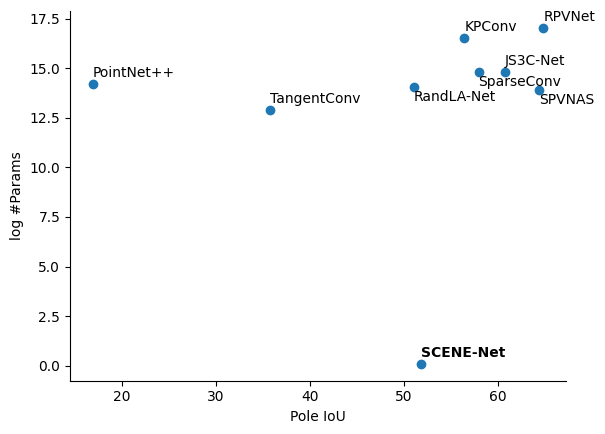

In [5]:
x, y = table[:, 1], table[:, 2]
x, y = x.astype(float), y.astype(float)

y = np.log(y*1e6)
print(x)
print(y)

fig, ax = plt.subplots()
rem_axis(ax, ['top', 'right'])  
ax.scatter(x, y)

for i, txt in enumerate(table[:, 0]):
    offset = -10 if (txt == 'SparseConv' or txt == 'SPVNAS' or txt == 'RandLA-Net') else 5
    bld ='bold' if txt == 'SCENE-Net' else None
 
    ax.annotate(txt, # this is the text
                (x[i], y[i]), # these are the coordinates to position the label
                weight=bld,
                textcoords="offset points", # how to position the text
                xytext=(0,offset), # distance from text to points (x,y)
                ha='left') # horizontal alignment can be left, right or center
    #ax.annotate(txt, (x[i] + 0.5, y[i]))

plt.xlabel('Pole IoU')
plt.ylabel('log #Params')
#plt.title(title)
plt.savefig('semKITTI_perf.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e61b7536-1dff-42d2-890f-f3864b1170c0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>